## Tweet Emotion Recognition

---

--




## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.17.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
!pip install datasets

from datasets import load_dataset

dataset=load_dataset("dair-ai/emotion")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.4 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
def get_tweets(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [ ]:
tweets, labels = get_tweets(train)

In [ ]:
tweets[0], labels[0]

('i didnt feel humiliated', 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[0]]))

[[2, 139, 3, 679]]


## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

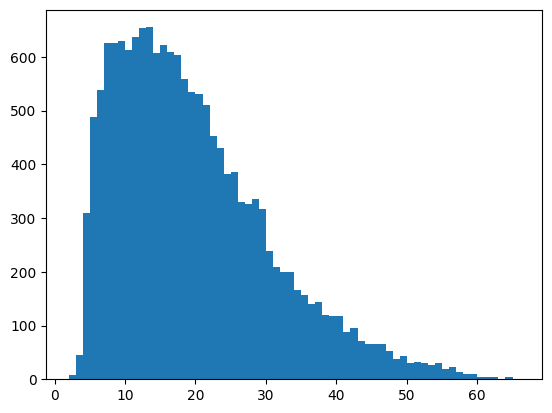

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [ ]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_sequences[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


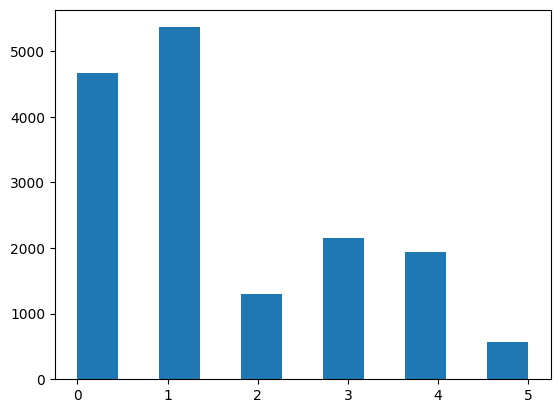

In [ ]:
plt.hist(labels, bins=11)
plt.show()

In [ ]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [ ]:
classes_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [ ]:
index_to_classes

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [ ]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[0])

0


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 32, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            320000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 128)          37632     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 432,902
Trainable params: 432,902
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h = model2.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 53s 83ms/step - loss: 1.1221 - accuracy: 0.5497 - val_loss: 0.4880 - val_accuracy: 0.8525
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2563 - accuracy: 0.9133 - val_loss: 0.2199 - val_accuracy: 0.9220
Epoch 3/20
500/500 [==============================] - 8s 15ms/step - loss: 0.1298 - accuracy: 0.9507 - val_loss: 0.2397 - val_accuracy: 0.9205
Epoch 4/20
500/500 [==============================] - 6s 13ms/step - loss: 0.0901 - accuracy: 0.9642 - val_loss: 0.2355 - val_accuracy: 0.9210


## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

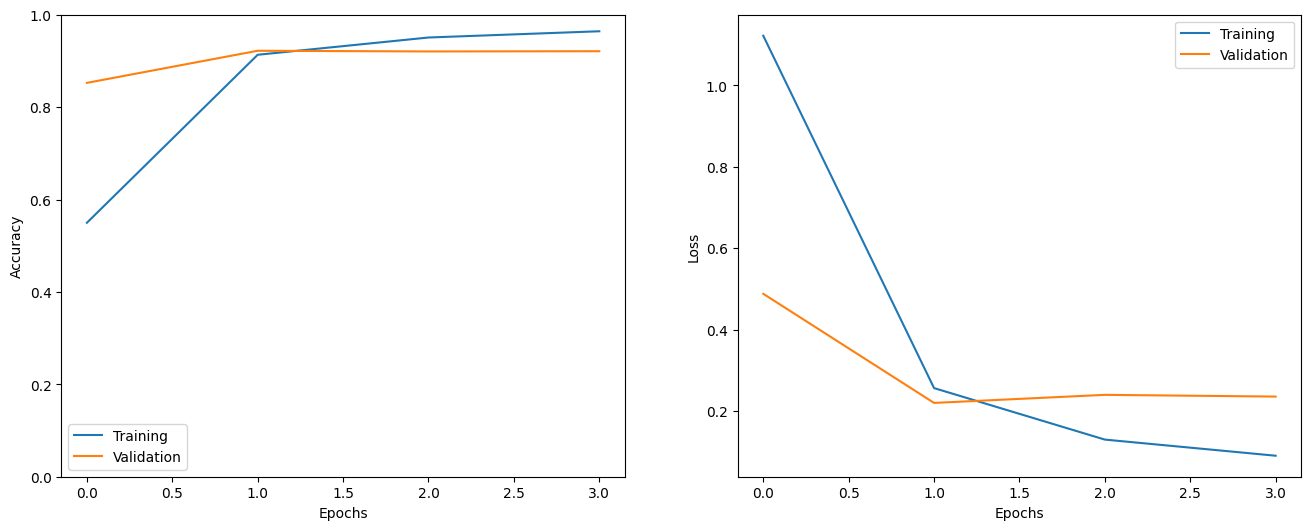

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:


# Evaluate the model and retrieve the accuracy
_, accuracy = model2.evaluate(test_sequences, test_labels)

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100

# Display the accuracy
print("Accuracy: {:.2f}%".format(accuracy_percentage))


63/63 [==============================] - 1s 8ms/step - loss: 0.2328 - accuracy: 0.9185
Accuracy: 91.85%


In [ ]:
i = random.randint(0, len(test_labels) - 1)

print('Sentence:', test_tweets[i])
print('Emotion:', index_to_classes[test_labels[i]])

probabilities = model2.predict(np.expand_dims(test_sequences[i], axis=0))[0]
p = np.argmax(probabilities)

print('Predicted Emotion:', index_to_classes.get(p))


Sentence: im taking is allowing me to get sleep which is wonderful but its leaving me feeling very groggy and nauseated
Emotion: 0
1/1 [==============================] - 1s 1s/step
Predicted Emotion: 0


In [ ]:
import numpy as np

pred_probs = model2.predict(test_sequences)
preds = np.argmax(pred_probs, axis=1)
test_labels_reshaped = np.reshape(test_labels, (-1, 1))
print("Shape of preds:", preds.shape)
print("Shape of test_labels:", test_labels_reshaped.shape)


63/63 [==============================] - 0s 6ms/step
Shape of preds: (2000,)
Shape of test_labels: (2000, 1)


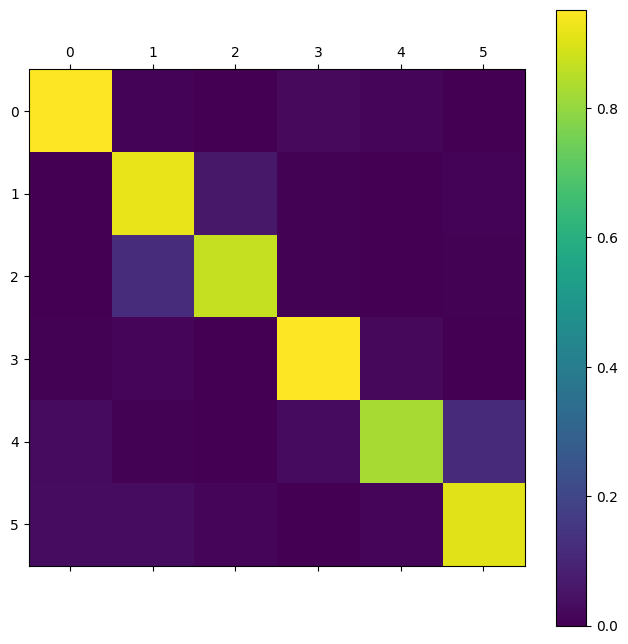

In [ ]:
show_confusion_matrix(test_labels, preds, list(classes))

63/63 [==============================] - 0s 6ms/step


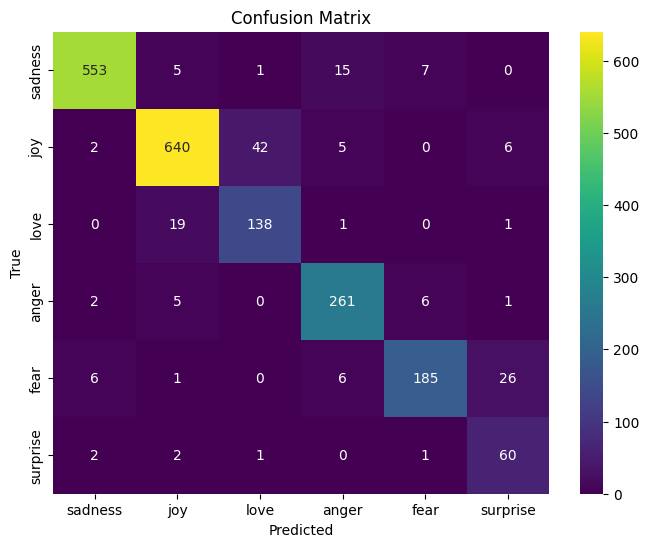

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

pred_probs = model2.predict(test_sequences)
preds = np.argmax(pred_probs, axis=1)
test_labels_reshaped = np.reshape(test_labels, (-1, 1))

confusion_mat = confusion_matrix(test_labels_reshaped, preds)
labels = [label_mapping[i] for i in range(len(label_mapping))]

plt.figure(figsize=(8, 6))
# Change the 'cmap' parameter value to adjust the color of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#in total precision

from sklearn.metrics import precision_score



# Calculate precision
precision = precision_score(test_labels, preds, average='weighted')

# Display precision
print("Precision:", precision)


Precision: 0.9253564970304854


In [ ]:
#seperate precision for each labels

from sklearn.metrics import precision_score



# Calculate precision
precision = precision_score(test_labels, preds, average=None)

# Display precision for each class
for label, score in zip(label_mapping.values(), precision):
    print(f"Precision for {label}: {score}")


Precision for sadness: 0.9787610619469026
Precision for joy: 0.9523809523809523
Precision for love: 0.7582417582417582
Precision for anger: 0.90625
Precision for fear: 0.9296482412060302
Precision for surprise: 0.6382978723404256


In [ ]:
#total_recall
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(test_labels, preds, average='weighted')

# Display recall
print("Recall:", recall)


Recall: 0.9185


In [ ]:
#seperate for each labels of data

from sklearn.metrics import recall_score


# Calculate recall
recall = recall_score(test_labels, preds, average=None)

# Display recall for each class
for label, score in zip(label_mapping.values(), recall):
    print(f"Recall for {label}: {score}")


Recall for sadness: 0.9518072289156626
Recall for joy: 0.920863309352518
Recall for love: 0.8679245283018868
Recall for anger: 0.9490909090909091
Recall for fear: 0.8258928571428571
Recall for surprise: 0.9090909090909091


In [ ]:
from sklearn.metrics import f1_score


# Calculate F1-score
f1 = f1_score(test_labels, preds, average='weighted')

# Display F1-score
print("F1-score:", f1)


F1-score: 0.9202940592512315


In [ ]:
from sklearn.metrics import f1_score



# Calculate F1-score
f1 = f1_score(test_labels, preds, average=None)

# Display F1-score for each class
for label, score in zip(label_mapping.values(), f1):
    print(f"F1-score for {label}: {score}")


F1-score for sadness: 0.9650959860383944
F1-score for joy: 0.936356986100951
F1-score for love: 0.809384164222874
F1-score for anger: 0.9271758436944937
F1-score for fear: 0.8747044917257684
F1-score for surprise: 0.75


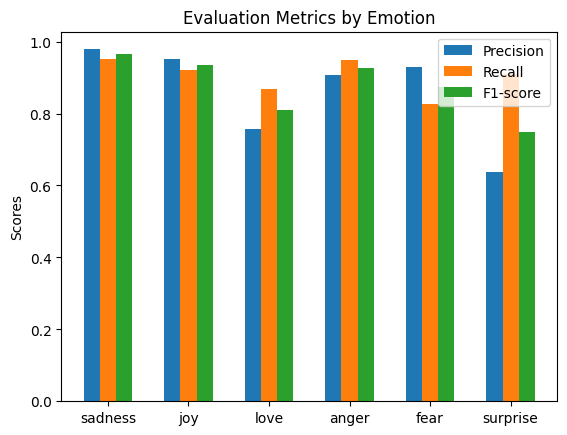

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate precision, recall, and F1-score
precision = precision_score(test_labels, preds, average=None)
recall = recall_score(test_labels, preds, average=None)
f1 = f1_score(test_labels, preds, average=None)

# Get emotion labels and their corresponding scores
emotion_labels = [label_mapping[i] for i in range(len(label_mapping))]
scores = [precision, recall, f1]

# Plotting the metrics
fig, ax = plt.subplots()
x = np.arange(len(emotion_labels))
width = 0.2

# Plot precision
ax.bar(x - width, scores[0], width, label='Precision')

# Plot recall
ax.bar(x, scores[1], width, label='Recall')

# Plot F1-score
ax.bar(x + width, scores[2], width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Emotion')
ax.set_xticks(x)
ax.set_xticklabels(emotion_labels)
ax.legend()

plt.show()


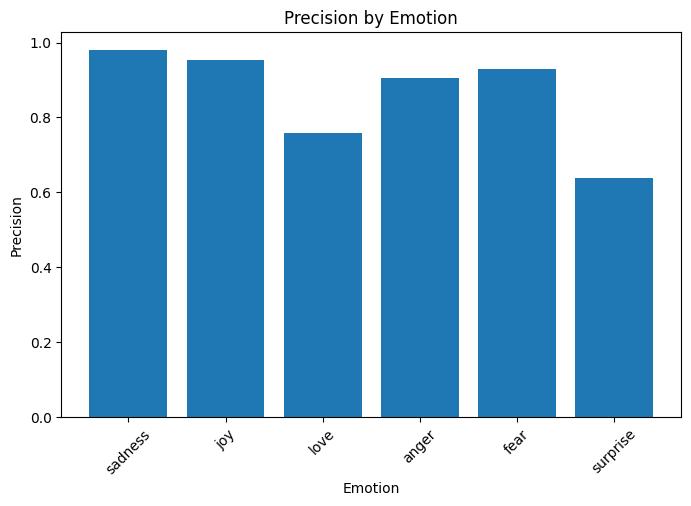

In [ ]:
from sklearn.metrics import precision_score


# Calculate precision
precision = precision_score(test_labels, preds, average=None)

# Get emotion labels and corresponding precision scores
emotion_labels = [label_mapping[i] for i in range(len(label_mapping))]

# Plotting precision
plt.figure(figsize=(8, 5))
plt.bar(emotion_labels, precision)
plt.title('Precision by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

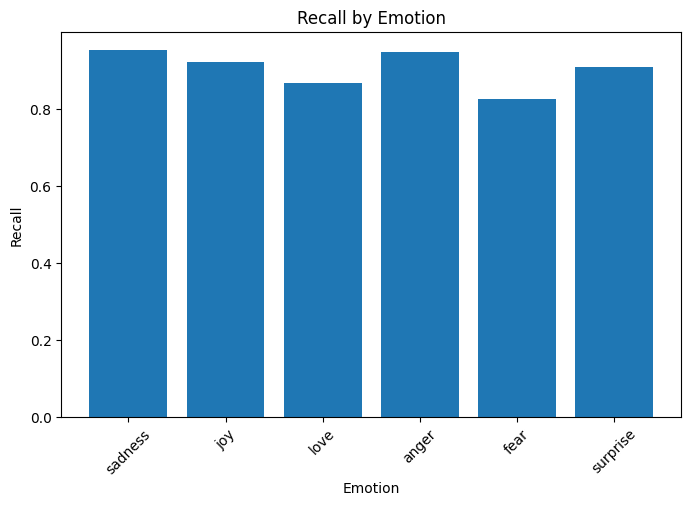

In [ ]:
#plot recall
from sklearn.metrics import recall_score


# Calculate recall
recall = recall_score(test_labels, preds, average=None)

# Get emotion labels and corresponding recall scores
emotion_labels = [label_mapping[i] for i in range(len(label_mapping))]

# Plotting recall
plt.figure(figsize=(8, 5))
plt.bar(emotion_labels, recall)
plt.title('Recall by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()








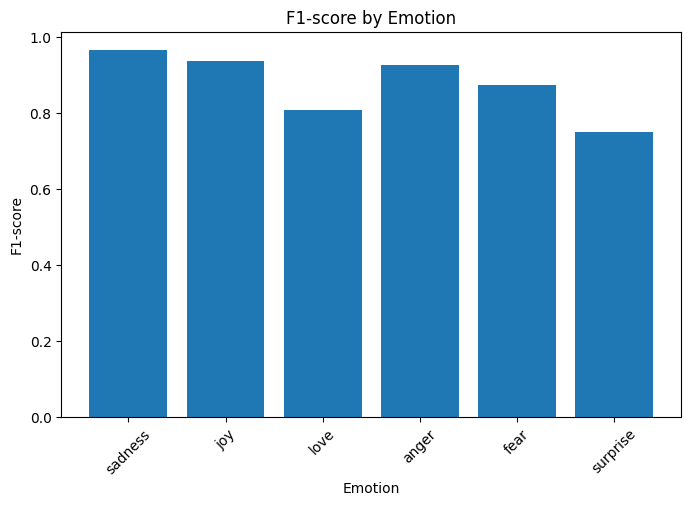

In [ ]:
#plot F-score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


# Calculate F1-score
f1 = f1_score(test_labels, preds, average=None)

# Get emotion labels and corresponding F1-scores
emotion_labels = [label_mapping[i] for i in range(len(label_mapping))]

# Plotting F1-score
plt.figure(figsize=(8, 5))
plt.bar(emotion_labels, f1)
plt.title('F1-score by Emotion')
plt.xlabel('Emotion')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.show()


# Classification_report of the Model

In [ ]:
from sklearn.metrics import classification_report


# Generate classification report
report = classification_report(test_labels, preds, target_names=label_mapping.values())

# Display the classification report
print(report)


              precision    recall  f1-score   support

     sadness       0.98      0.95      0.97       581
         joy       0.95      0.92      0.94       695
        love       0.76      0.87      0.81       159
       anger       0.91      0.95      0.93       275
        fear       0.93      0.83      0.87       224
    surprise       0.64      0.91      0.75        66

    accuracy                           0.92      2000
   macro avg       0.86      0.90      0.88      2000
weighted avg       0.93      0.92      0.92      2000



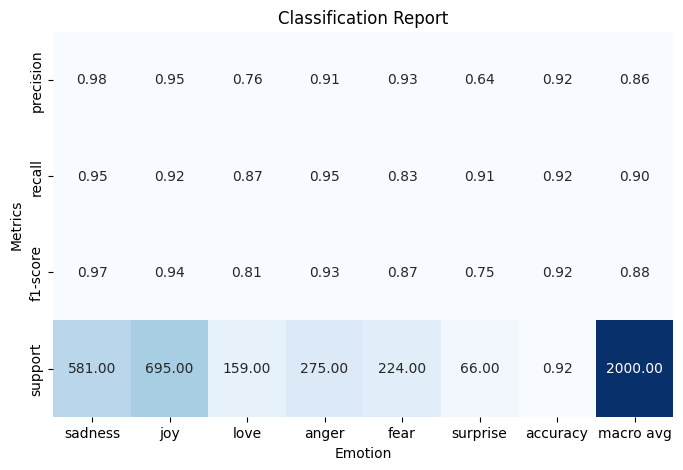

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(test_labels, preds, target_names=label_mapping.values(), output_dict=True)

# Convert report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heat map
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.xlabel('Emotion')
plt.ylabel('Metrics')
plt.show()


#  Compute the ROC curve and AUC for each emotion class

In [ ]:
import numpy as np
from scipy.special import softmax



# Generate predictions for the test data
predicted_probs = model2.predict(test_sequences)

# Convert predicted_probs to probabilities by applying softmax
predicted_probs = softmax(predicted_probs, axis=1)

print(predicted_probs)




63/63 [==============================] - 0s 6ms/step
[[0.3520435  0.12962468 0.12957886 0.12959152 0.12958352 0.12957783]
 [0.3521529  0.12957491 0.1295664  0.12957057 0.12956902 0.12956618]
 [0.35178122 0.12969542 0.12960637 0.12965578 0.12965523 0.12960605]
 ...
 [0.1296167  0.35206392 0.12958758 0.12957647 0.12957817 0.12957713]
 [0.15795693 0.30727416 0.13369076 0.1336968  0.13370703 0.13367437]
 [0.13180774 0.1325284  0.13625197 0.13179862 0.13728897 0.33032423]]


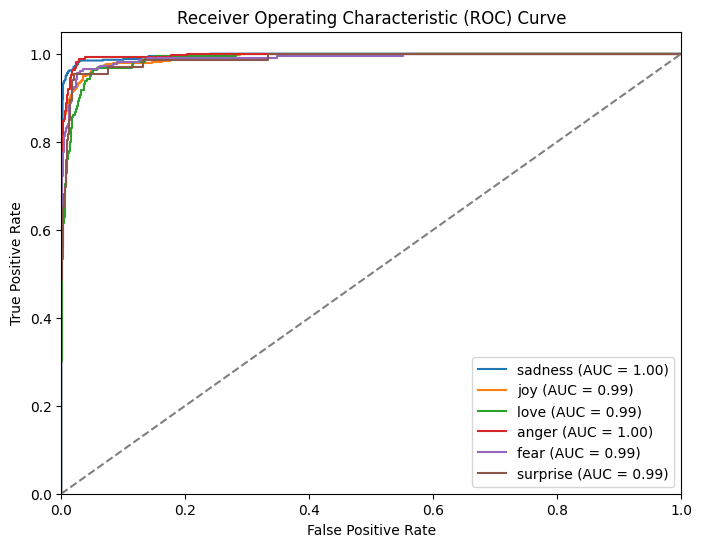

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Convert test_labels and predicted_probs to numpy arrays if they are not already
test_labels = np.array(test_labels)
predicted_probs = np.array(predicted_probs)

# Compute the ROC curve and AUC for each emotion class using the One-vs-Rest approach
fpr = {}
tpr = {}
roc_auc = {}

label_mapping = {'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

for label, class_index in label_mapping.items():
    class_probs = predicted_probs[:, class_index]
    fpr[label], tpr[label], _ = roc_curve(test_labels == class_index, class_probs)
    roc_auc[label] = auc(fpr[label], tpr[label])

# Plot the ROC curve for each emotion class
plt.figure(figsize=(8, 6))
for label in label_mapping.keys():
    plt.plot(fpr[label], tpr[label], label=f'{label} (AUC = {roc_auc[label]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



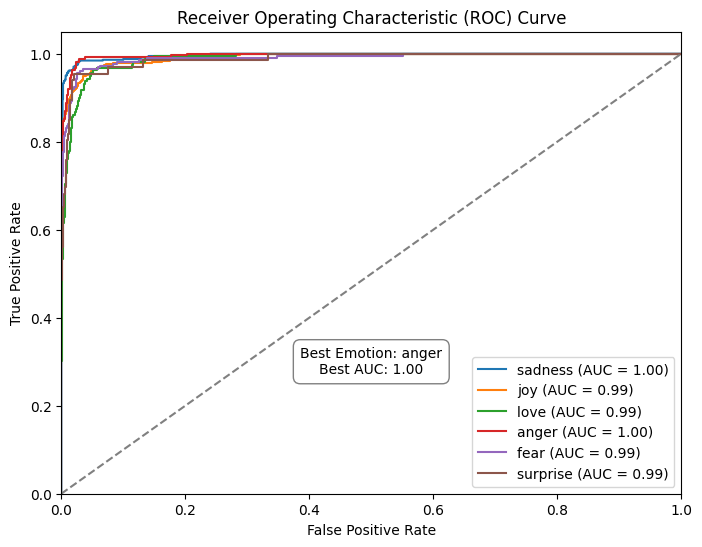

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Convert test_labels and predicted_probs to numpy arrays if they are not already
test_labels = np.array(test_labels)
predicted_probs = np.array(predicted_probs)

# Compute the ROC curve and AUC for each emotion class using the One-vs-Rest approach
fpr = {}
tpr = {}
roc_auc = {}

label_mapping = {'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

for label, class_index in label_mapping.items():
    class_probs = predicted_probs[:, class_index]
    fpr[label], tpr[label], _ = roc_curve(test_labels == class_index, class_probs)
    roc_auc[label] = auc(fpr[label], tpr[label])

# Find the emotion with the highest AUC
best_emotion = max(roc_auc, key=roc_auc.get)
best_auc = roc_auc[best_emotion]

# Plot the ROC curve for each emotion class
plt.figure(figsize=(8, 6))
for label in label_mapping.keys():
    plt.plot(fpr[label], tpr[label], label=f'{label} (AUC = {roc_auc[label]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the best emotion and its AUC
plt.text(0.5, 0.3, f'Best Emotion: {best_emotion}\nBest AUC: {best_auc:.2f}', ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.show()
